<a href="https://colab.research.google.com/github/Ambrose70/Applied-Data-science/blob/main/Spacexlab_folium_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import piplite # piplite is not available in this environment
# await piplite.install(['numpy'])
# await piplite.install(['pandas'])
# await piplite.install(['seaborn'])

!pip install numpy pandas seaborn

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# **Exploratory Data Analysis**

In [3]:
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


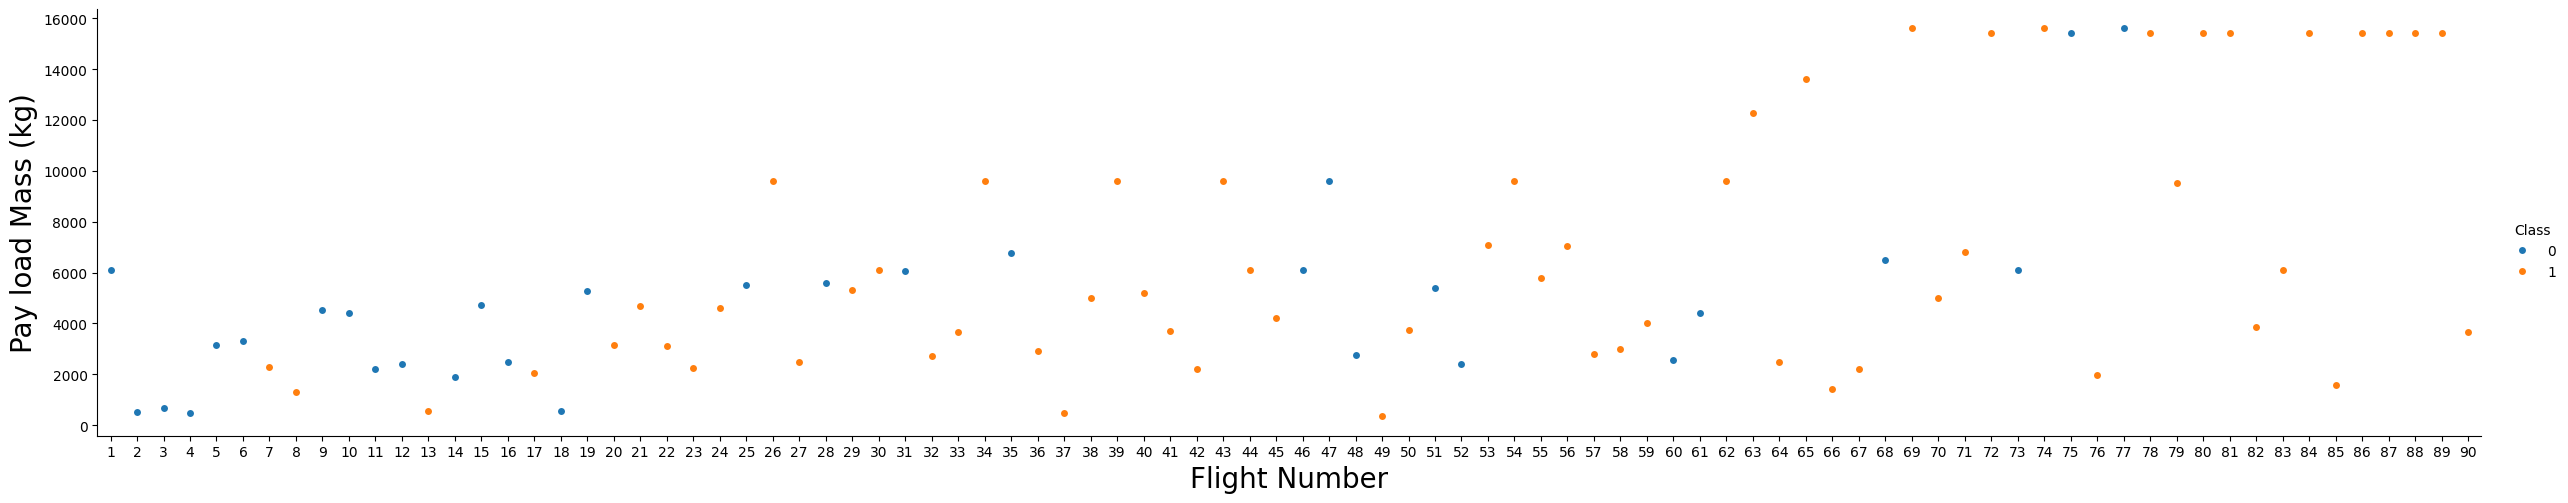

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

# **TASK 1: Visualize the relationship between Flight Number and Launch Site**

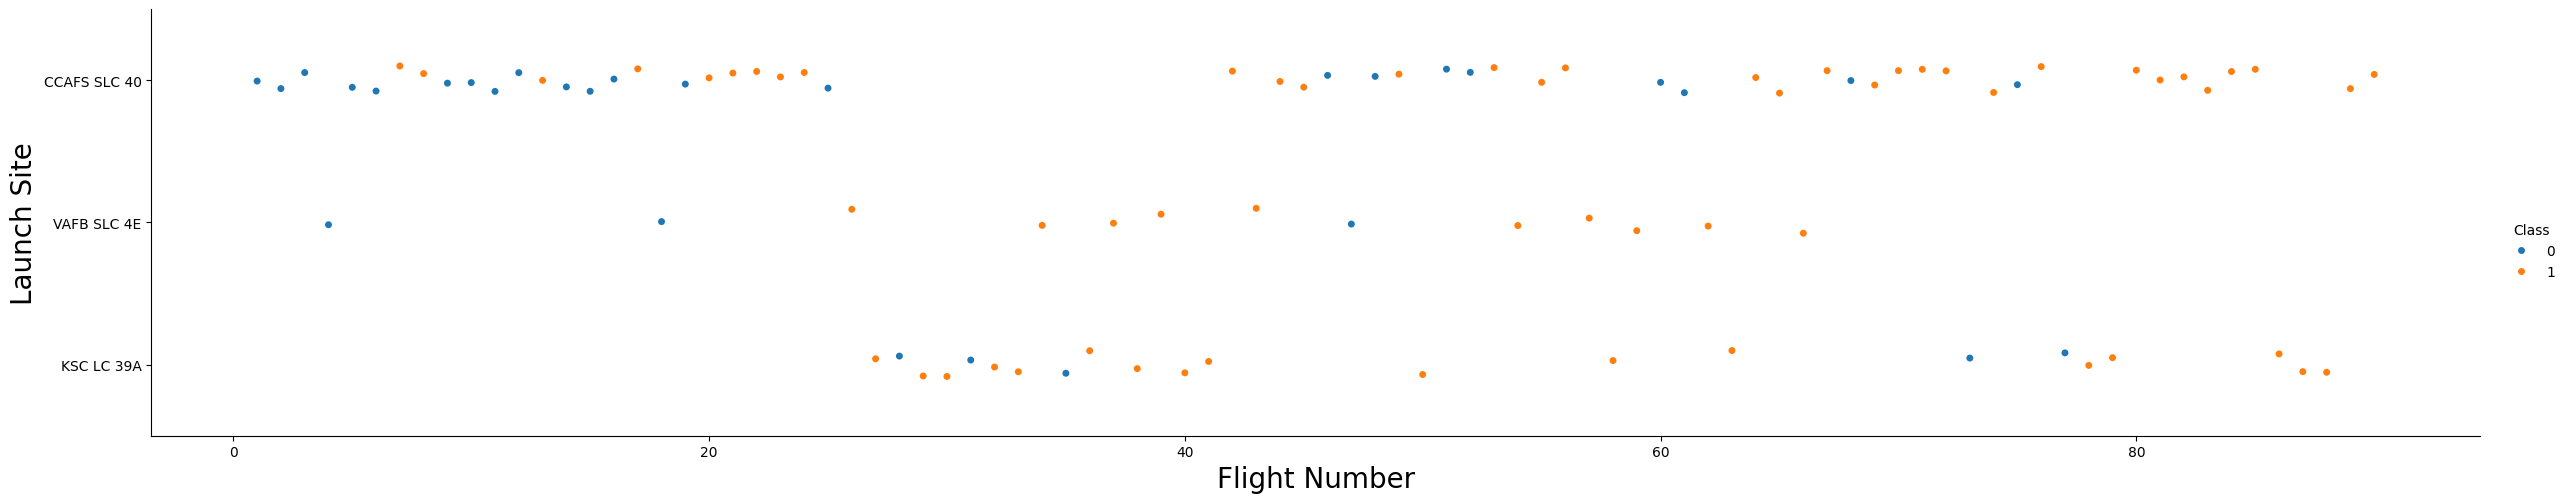

In [5]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

# **TASK 2: Visualize the relationship between Payload Mass and Launch Site**

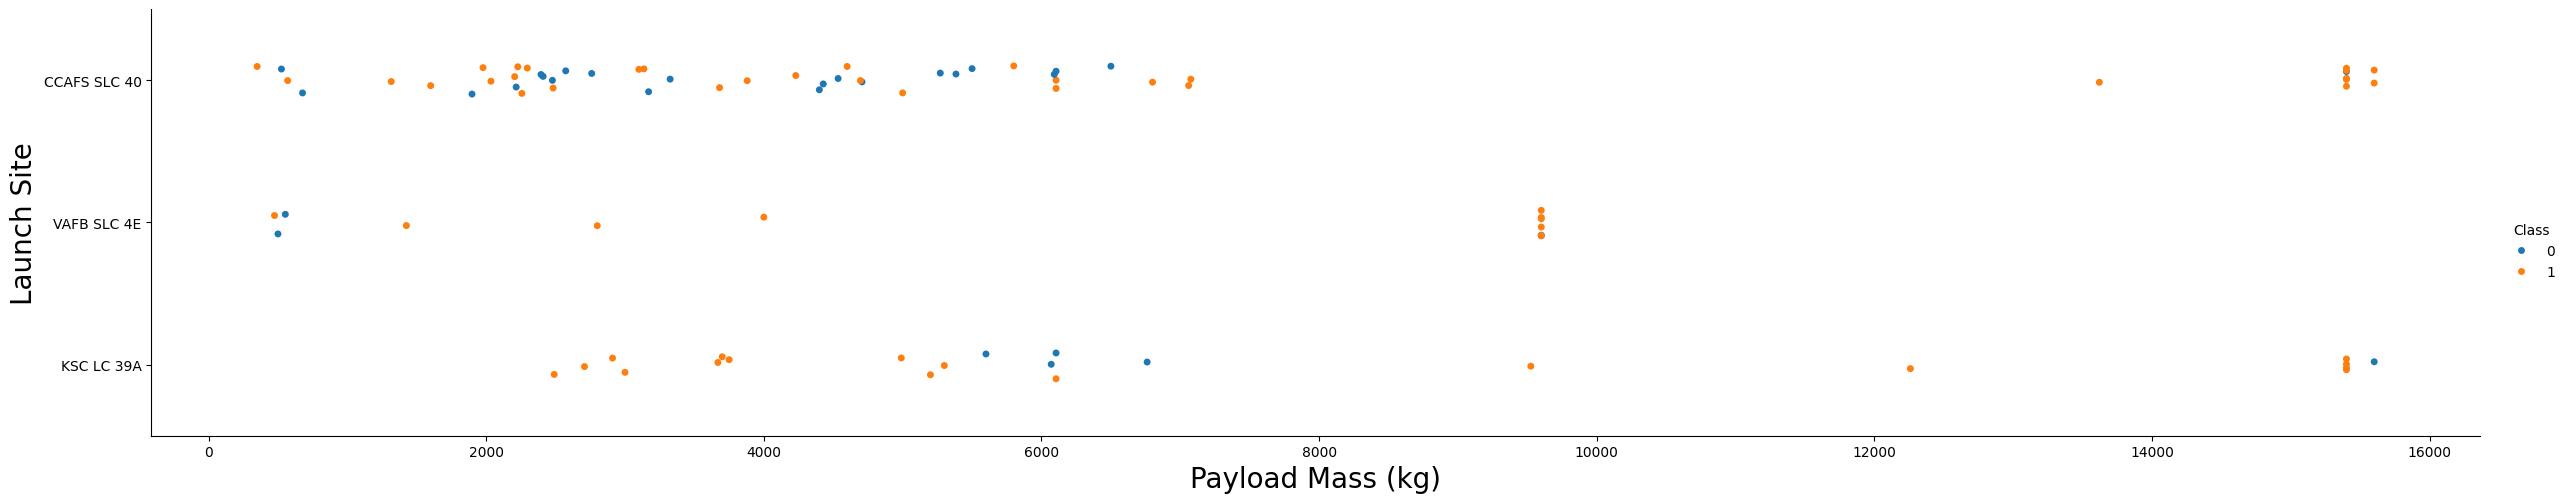

In [6]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

TASK 3: Visualize the relationship between success rate of each orbit type

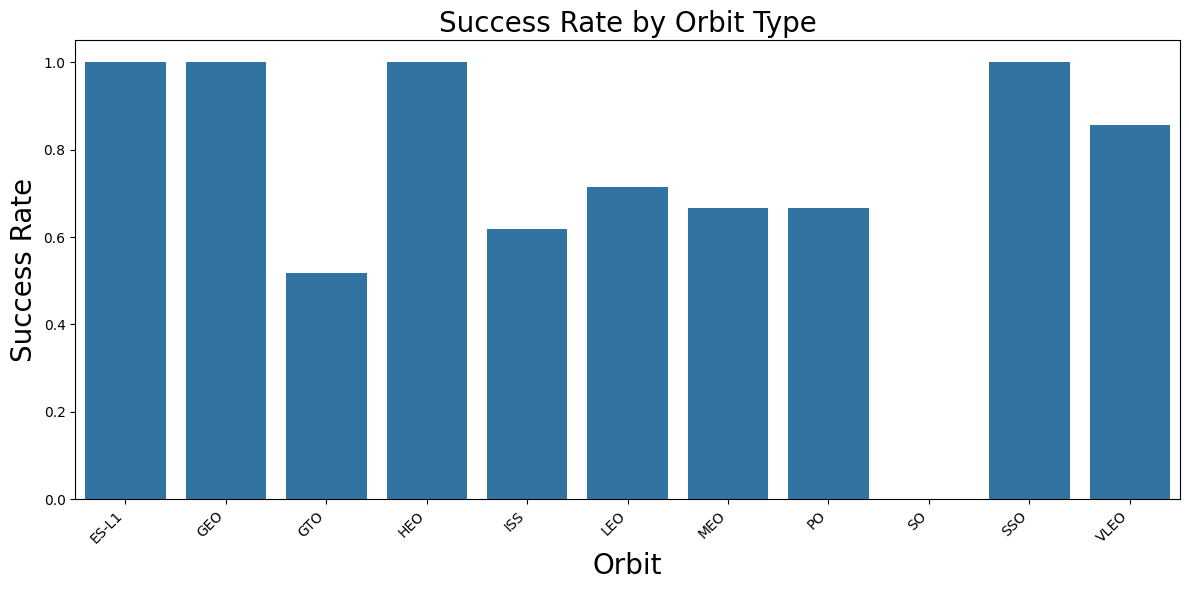

In [7]:
# Group the data by Orbit and calculate the mean of the Class column
orbit_success_rate = df.groupby('Orbit')['Class'].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=orbit_success_rate.index, y=orbit_success_rate.values)
plt.xlabel("Orbit", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.title("Success Rate by Orbit Type", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

TASK 4: Visualize the relationship between FlightNumber and Orbit type

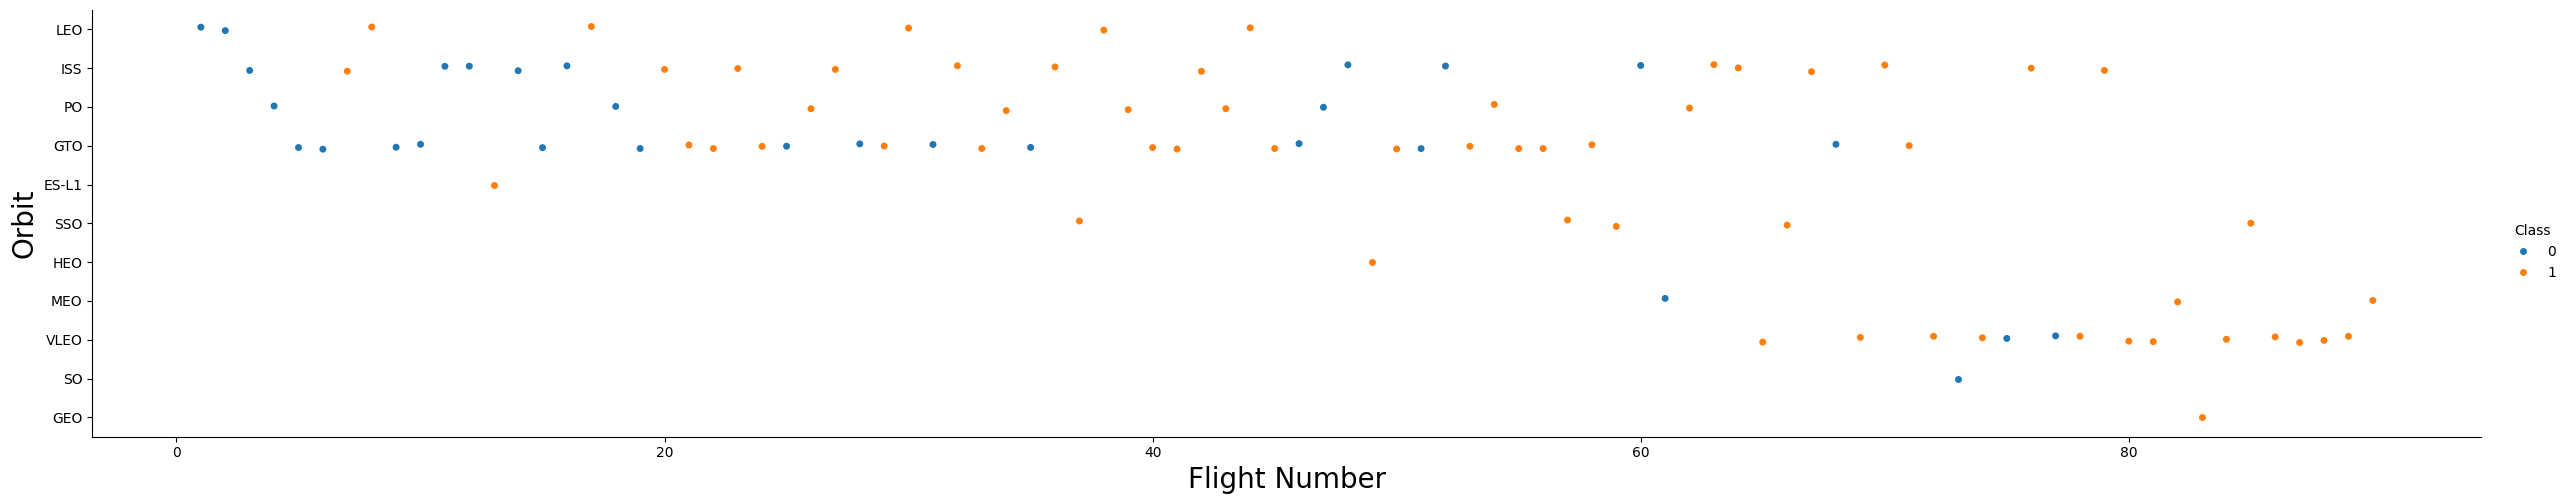

In [8]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

TASK 5: Visualize the relationship between Payload Mass and Orbit type

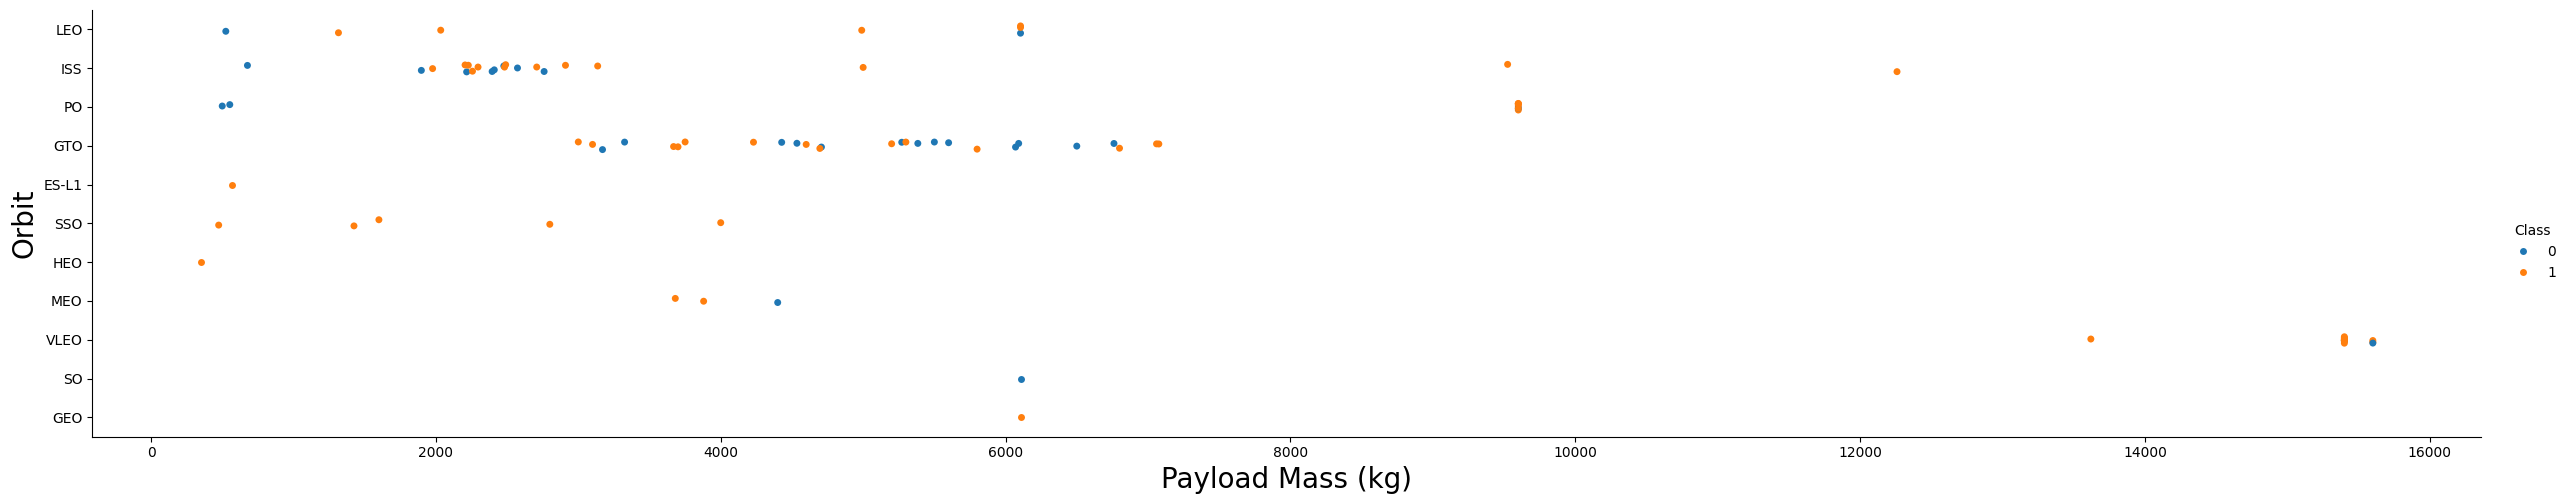

In [9]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

TASK 6: Visualize the launch success yearly trend

In [10]:
# A function to Extract years from the date
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


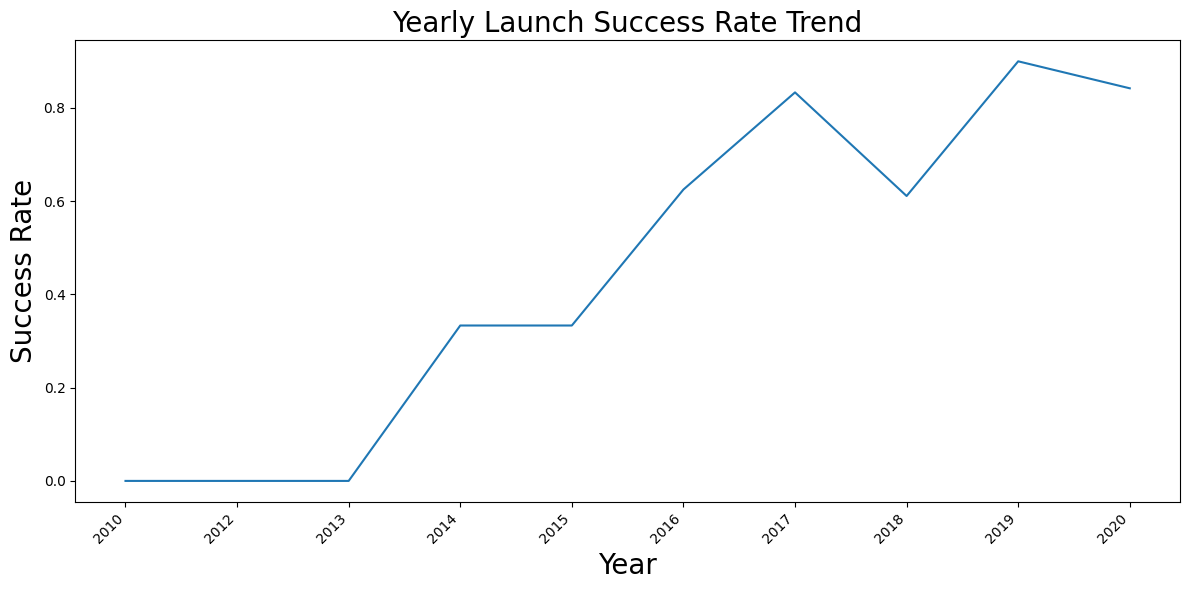

In [11]:
# Group by year and calculate the mean success rate
yearly_success_rate = df.groupby('Date')['Class'].mean()

# Plot a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_success_rate.index, y=yearly_success_rate.values)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.title("Yearly Launch Success Rate Trend", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Features Engineering**

In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


TASK 7: Create dummy variables to categorical columns

In [13]:
# Apply One-Hot Encoding
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the results
display(features_one_hot.head())

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


TASK 8: Cast all numeric columns to float64

In [14]:
features_one_hot = features_one_hot.astype('float64')

In [15]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [16]:
print("Total number of columns in features_one_hot dataframe:", features_one_hot.shape[1])

Total number of columns in features_one_hot dataframe: 80


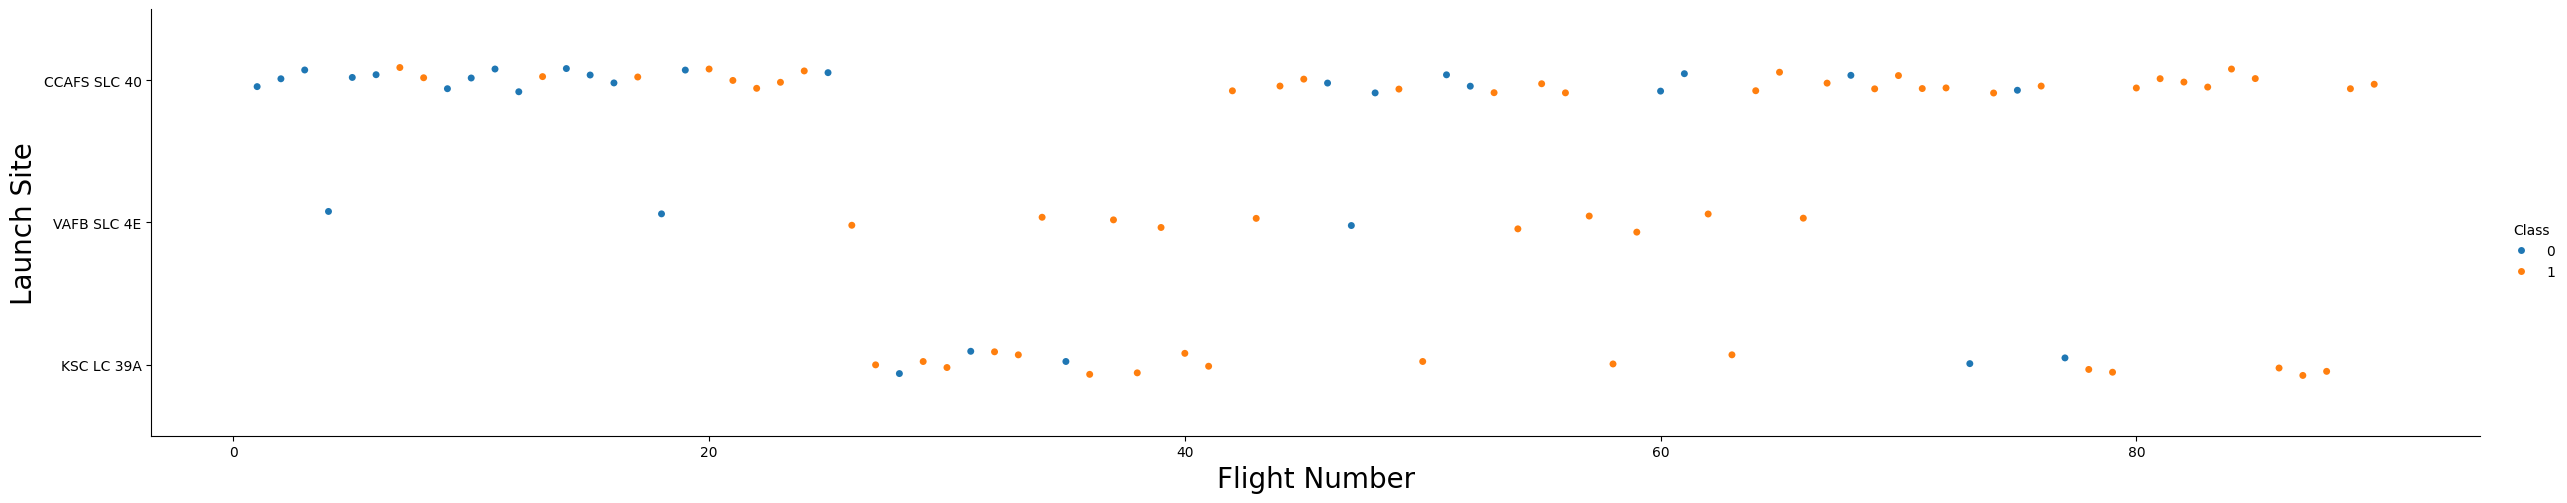

In [17]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

# **Folium Map**

In [18]:
import folium

# Create a map centered around a specific location (e.g., the mean coordinates of the launch sites)
# You can calculate the mean latitude and longitude from your dataframe if needed
mean_latitude = df['Latitude'].mean()
mean_longitude = df['Longitude'].mean()

spacex_map = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=5)

# Display the map
spacex_map

### Folium Map Objects Explained

Folium is a powerful library for creating interactive maps in Python. Here are some common map objects you can add:

*   **Markers:** Used to pinpoint specific locations on the map. They can display information when clicked.
*   **Circles:** Draw circles on the map, useful for representing areas or radii around a point.
*   **Lines:** Connect points on the map with lines, useful for showing paths or routes.
*   **Polygons:** Draw filled shapes on the map, useful for representing areas.
*   **Popups:** Interactive boxes that appear when a marker or other object is clicked, displaying additional information.
*   **Tooltips:** Small text boxes that appear when hovering over a marker or other object.
*   **Tile Layers:** Different base maps (e.g., OpenStreetMap, Stamen Toner) that provide the background for your map.
*   **Feature Groups:** Used to group together related map objects.

You can customize the appearance and behavior of these objects with various options.

# Task
Create a folium map visualizing launch sites and launch outcomes, and summarize the map objects used.

## Visualize the launch sites

### Subtask:
Create `folium.Marker` objects for each launch site with their latitude and longitude.


**Reasoning**:
Create a Folium map and add markers for each launch site with tooltips showing the launch site name.



In [19]:
# Create a map centered around the mean coordinates of the launch sites
mean_latitude = df['Latitude'].mean()
mean_longitude = df['Longitude'].mean()
spacex_map = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=5)

# Group the data by LaunchSite and get the mean latitude and longitude for each site
launch_sites = df.groupby('LaunchSite')[['Latitude', 'Longitude']].mean()

# Iterate through each launch site and add a marker to the map
for index, site_info in launch_sites.iterrows():
    site_name = index
    site_latitude = site_info['Latitude']
    site_longitude = site_info['Longitude']

    # Create a marker for the launch site
    marker = folium.Marker(
        location=[site_latitude, site_longitude],
        tooltip=site_name
    )

    # Add the marker to the map
    marker.add_to(spacex_map)

# Display the map
spacex_map

## Add markers to the map for success/failure

### Subtask:
Create `folium.Marker` objects for each launch with a different color for success (class=1) and failure (class=0). Add a popup with information about the launch.


**Reasoning**:
Iterate through the dataframe to create markers for each launch with different colors based on success or failure and add popups with launch details.



In [20]:
for index, row in df.iterrows():
    # Determine marker color based on Class (success or failure)
    marker_color = 'green' if row['Class'] == 1 else 'red'

    # Create a popup with launch information
    popup_html = f"""
    <b>Flight Number:</b> {row['FlightNumber']}<br>
    <b>Launch Site:</b> {row['LaunchSite']}<br>
    <b>Payload Mass (kg):</b> {row['PayloadMass']}<br>
    <b>Orbit:</b> {row['Orbit']}<br>
    <b>Outcome:</b> {'Success' if row['Class'] == 1 else 'Failure'}
    """

    # Create a folium.Marker object
    marker = folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        icon=folium.Icon(color=marker_color),
        popup=folium.Popup(popup_html, max_width=300)
    )

    # Add the marker to the map
    marker.add_to(spacex_map)

# Display the map
spacex_map

## Summary:

### Data Analysis Key Findings

*   The Folium map was centered around the mean latitude and longitude of the launch sites.
*   Markers with tooltips were added for each unique launch site using their mean coordinates.
*   Individual markers were added for each launch, with colors indicating success (green) or failure (red).
*   Each launch marker includes a popup with details such as Flight Number, Launch Site, Payload Mass, Orbit, and outcome.

### Insights or Next Steps

*   The visualization provides a clear spatial representation of launch success and failure across different sites.
*   Further analysis could involve adding layers to the map to show geographical features or other relevant data.
